<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

Множественная классификация

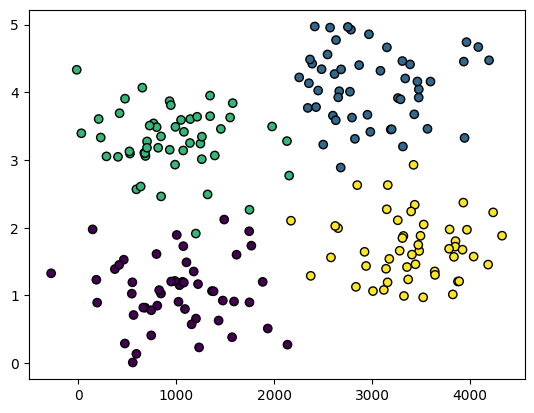

In [5]:
from sklearn.datasets import make_blobs

blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200,
                          centers=blob_centers,
                          cluster_std=0.5,
                          random_state=0)
#масштабируем
X[:, 0] *= 1000

#набор данных, состоящих из 4 кластеров, принадлежащих 4 классам
plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [6]:
X.shape, y.shape

((200, 2), (200,))

Первая версия нашей нейросети

In [9]:
from sklearn.neural_network import MLPClassifier

#1 параметр - передется картеж 1 скрытый слой c 6 нейронами
#   вход - 2 нейрона, скрытый - 6 неройнов, выход 4 нейрона
#2 параметр -
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X, y)

Веса

In [12]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [14]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i+1, j+1, weights, end=", ")
        print()
    print()

1 1 [-0.09809877 -0.58903611], 
1 2 [ 0.33667051 -0.31219238], 
1 3 [-0.82024119 -0.22424296], 
1 4 [-0.29720839  0.11423652], 
1 5 [-0.56852789 -0.18324369], 
1 6 [-0.66056109  0.37321781], 

2 1 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
2 2 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
2 3 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
2 4 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [15]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(f"Матрица классификации:\n {confusion_matrix(y, clf.predict(X))}")
print(f"Точность модели: {accuracy_score(y, clf.predict(X))}")

Матрица классификации:
 [[ 0  0  1 49]
 [ 0  0  0 50]
 [ 0  0  1 49]
 [ 0  0  0 50]]
Точность модели: 0.255


Классификация на графике

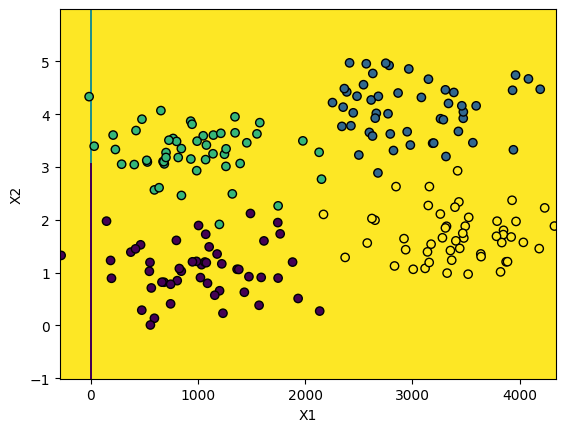

In [20]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Нормализация данных

In [24]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


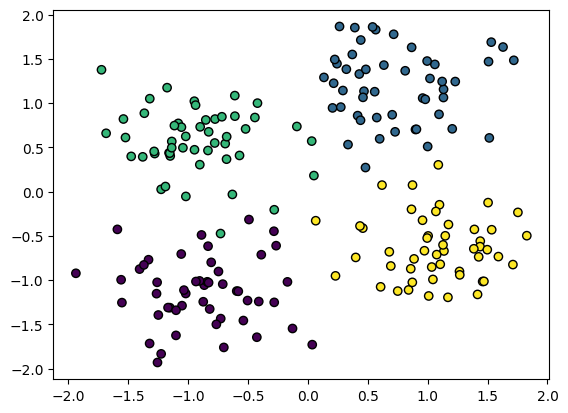

In [28]:
clf = MLPClassifier(hidden_layer_sizes=(6,),
                    random_state=1).fit(X_scaled, y)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)

In [31]:
print(f"Матрица классификации:\n {confusion_matrix(y, clf.predict(X_scaled))}")
print(f"Точность модели: {accuracy_score(y, clf.predict(X_scaled))}")

Матрица классификации:
 [[22  0 11 17]
 [ 0 38  0 12]
 [ 0  3 45  2]
 [ 0  5  0 45]]
Точность модели: 0.75


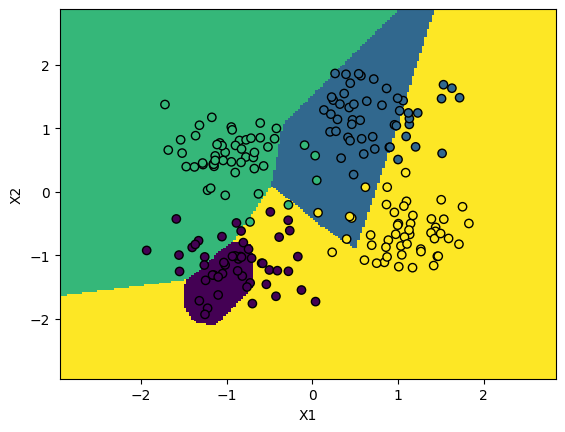

In [32]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Увеличиваем кол-во итераций

In [33]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.38872520
Iteration 2, loss = 1.38465908
Iteration 3, loss = 1.38060533
Iteration 4, loss = 1.37656664
Iteration 5, loss = 1.37254204
Iteration 6, loss = 1.36853176
Iteration 7, loss = 1.36453389
Iteration 8, loss = 1.36054431
Iteration 9, loss = 1.35656387
Iteration 10, loss = 1.35259776
Iteration 11, loss = 1.34864480
Iteration 12, loss = 1.34470519
Iteration 13, loss = 1.34077907
Iteration 14, loss = 1.33686517
Iteration 15, loss = 1.33295922
Iteration 16, loss = 1.32906667
Iteration 17, loss = 1.32518633
Iteration 18, loss = 1.32131996
Iteration 19, loss = 1.31746775
Iteration 20, loss = 1.31362949
Iteration 21, loss = 1.30979779
Iteration 22, loss = 1.30597832
Iteration 23, loss = 1.30217209
Iteration 24, loss = 1.29837913
Iteration 25, loss = 1.29460021
Iteration 26, loss = 1.29083148
Iteration 27, loss = 1.28706625
Iteration 28, loss = 1.28331182
Iteration 29, loss = 1.27956994
Iteration 30, loss = 1.27584020
Iteration 31, loss = 1.27212154
Iteration 32, los

In [34]:
print(f"Матрица классификации:\n {confusion_matrix(y, clf.predict(X_scaled))}")
print(f"Точность модели: {accuracy_score(y, clf.predict(X_scaled))}")

Матрица классификации:
 [[50  0  0  0]
 [ 0 50  0  0]
 [ 1  1 48  0]
 [ 1  0  0 49]]
Точность модели: 0.985


Увеличение скртых слоев

In [35]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10_000).fit(X_scaled, y)

In [36]:
print(f"Матрица классификации:\n {confusion_matrix(y, clf.predict(X_scaled))}")
print(f"Точность модели: {accuracy_score(y, clf.predict(X_scaled))}")

Матрица классификации:
 [[50  0  0  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]]
Точность модели: 0.995
